# Housing Prices



In [1]:
# Imports Libraries, ect
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import xgboost as xg

sns.set_style('darkgrid')

import tensorflow as tf
from tensorflow import keras

# Dictionary to store mse scores
dict_mse = {}

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Normalizer

In [2]:
df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")
df_train_kaggle = pd.read_csv("housing_train.csv")

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
r,c = df_train.shape
print('The training data has {} rows and {} columns'.format(r,c))
r,c = df_test.shape
print('The validation data has {} rows and {} columns'.format(r,c))

The training data has 1460 rows and 81 columns
The validation data has 1459 rows and 80 columns


That is quite a lot of information, as a next step I will try to select what is only necessary for our model.

<Axes: >

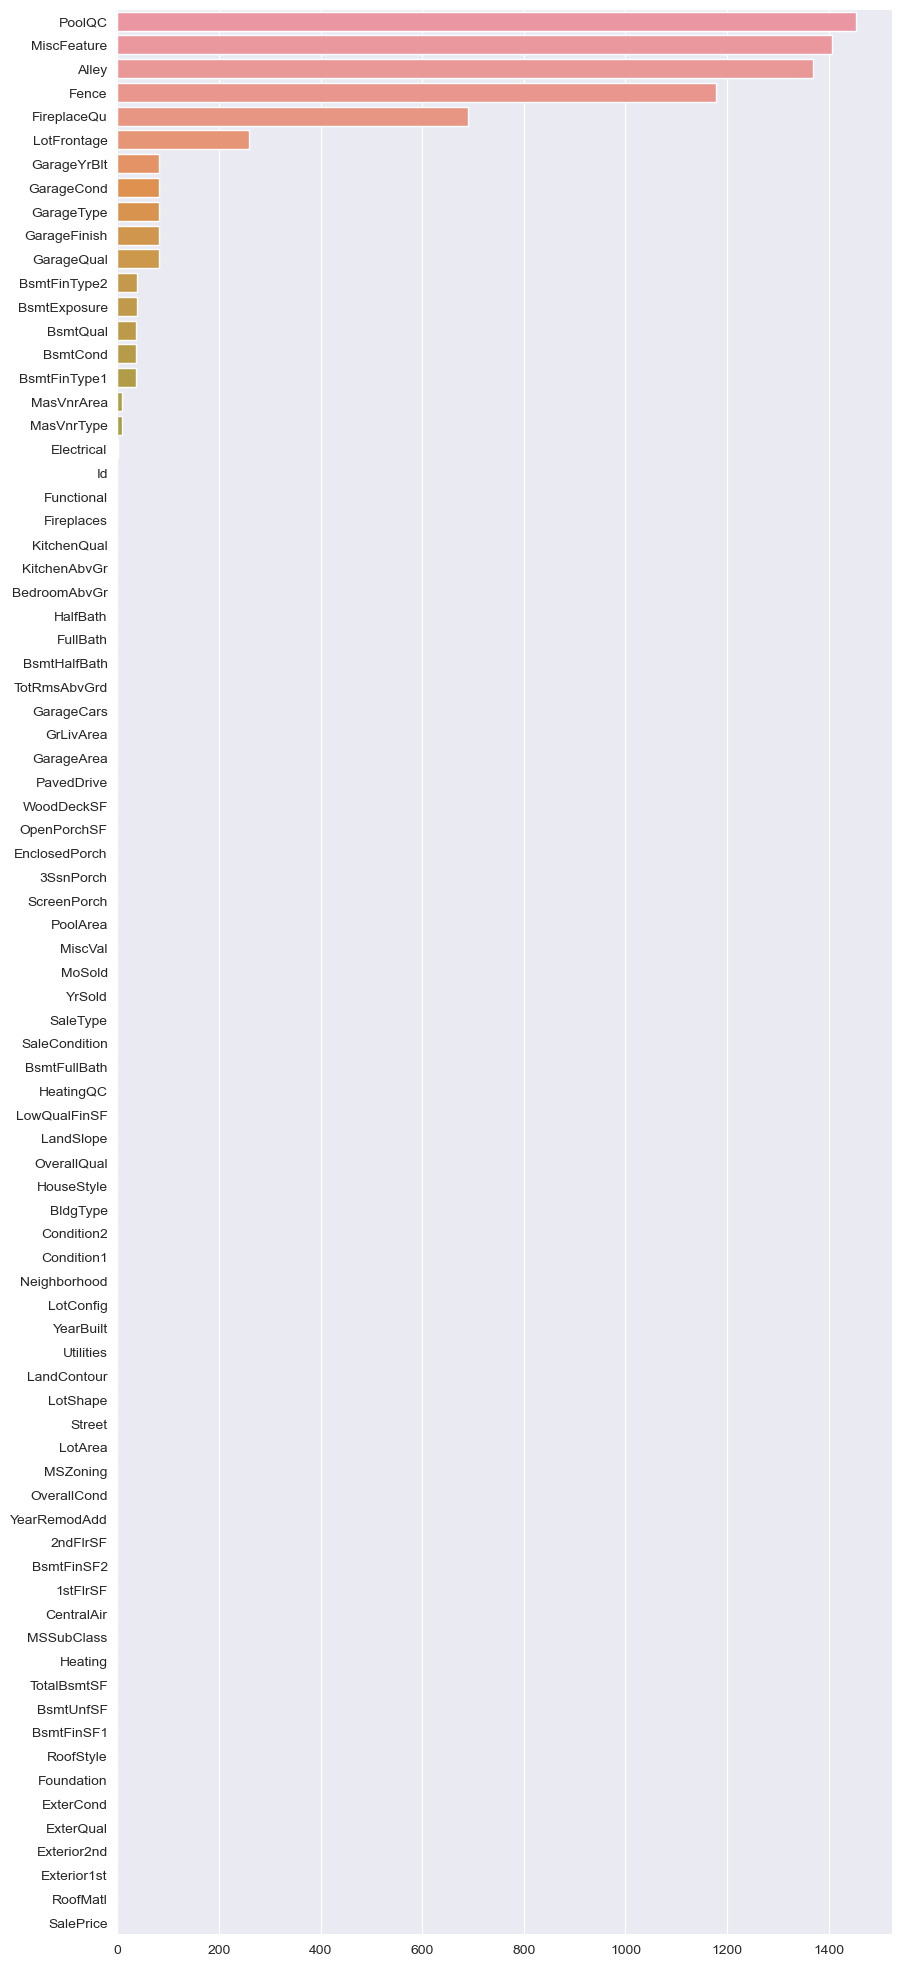

In [7]:
# Plotting Null values
plt.figure(figsize=(10,25))

null_vals = df_train.isnull().sum().sort_values(ascending=False)

sns.barplot(x=null_vals, y=null_vals.index, orient='h')

In [8]:
null_vals.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

For the next step I will look for outliers that could hinder the accuracy of our results

C:\Users\U360269\AppData\Local\Temp\ipykernel_22136\1173911428.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr())


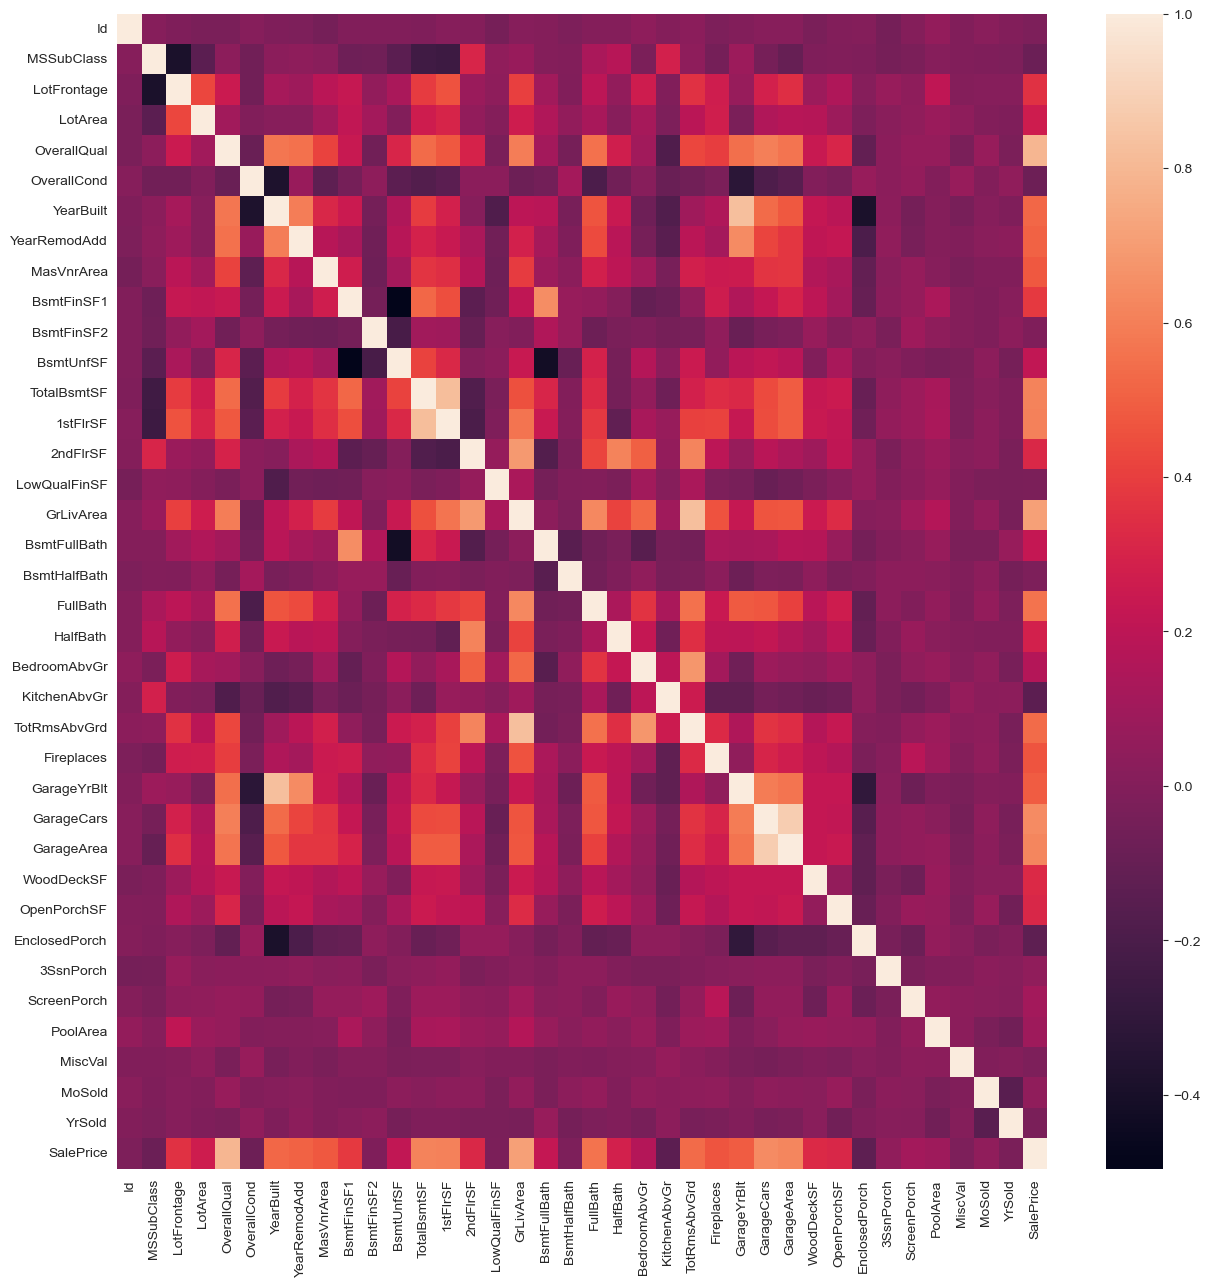

In [9]:
# Creates a Correlation map
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr())
plt.show()

I believe most outliers will be located in the area of ground and lot space as well as in the price. Below I will create plots to verify if I am correct.

<Axes: xlabel='SalePrice'>

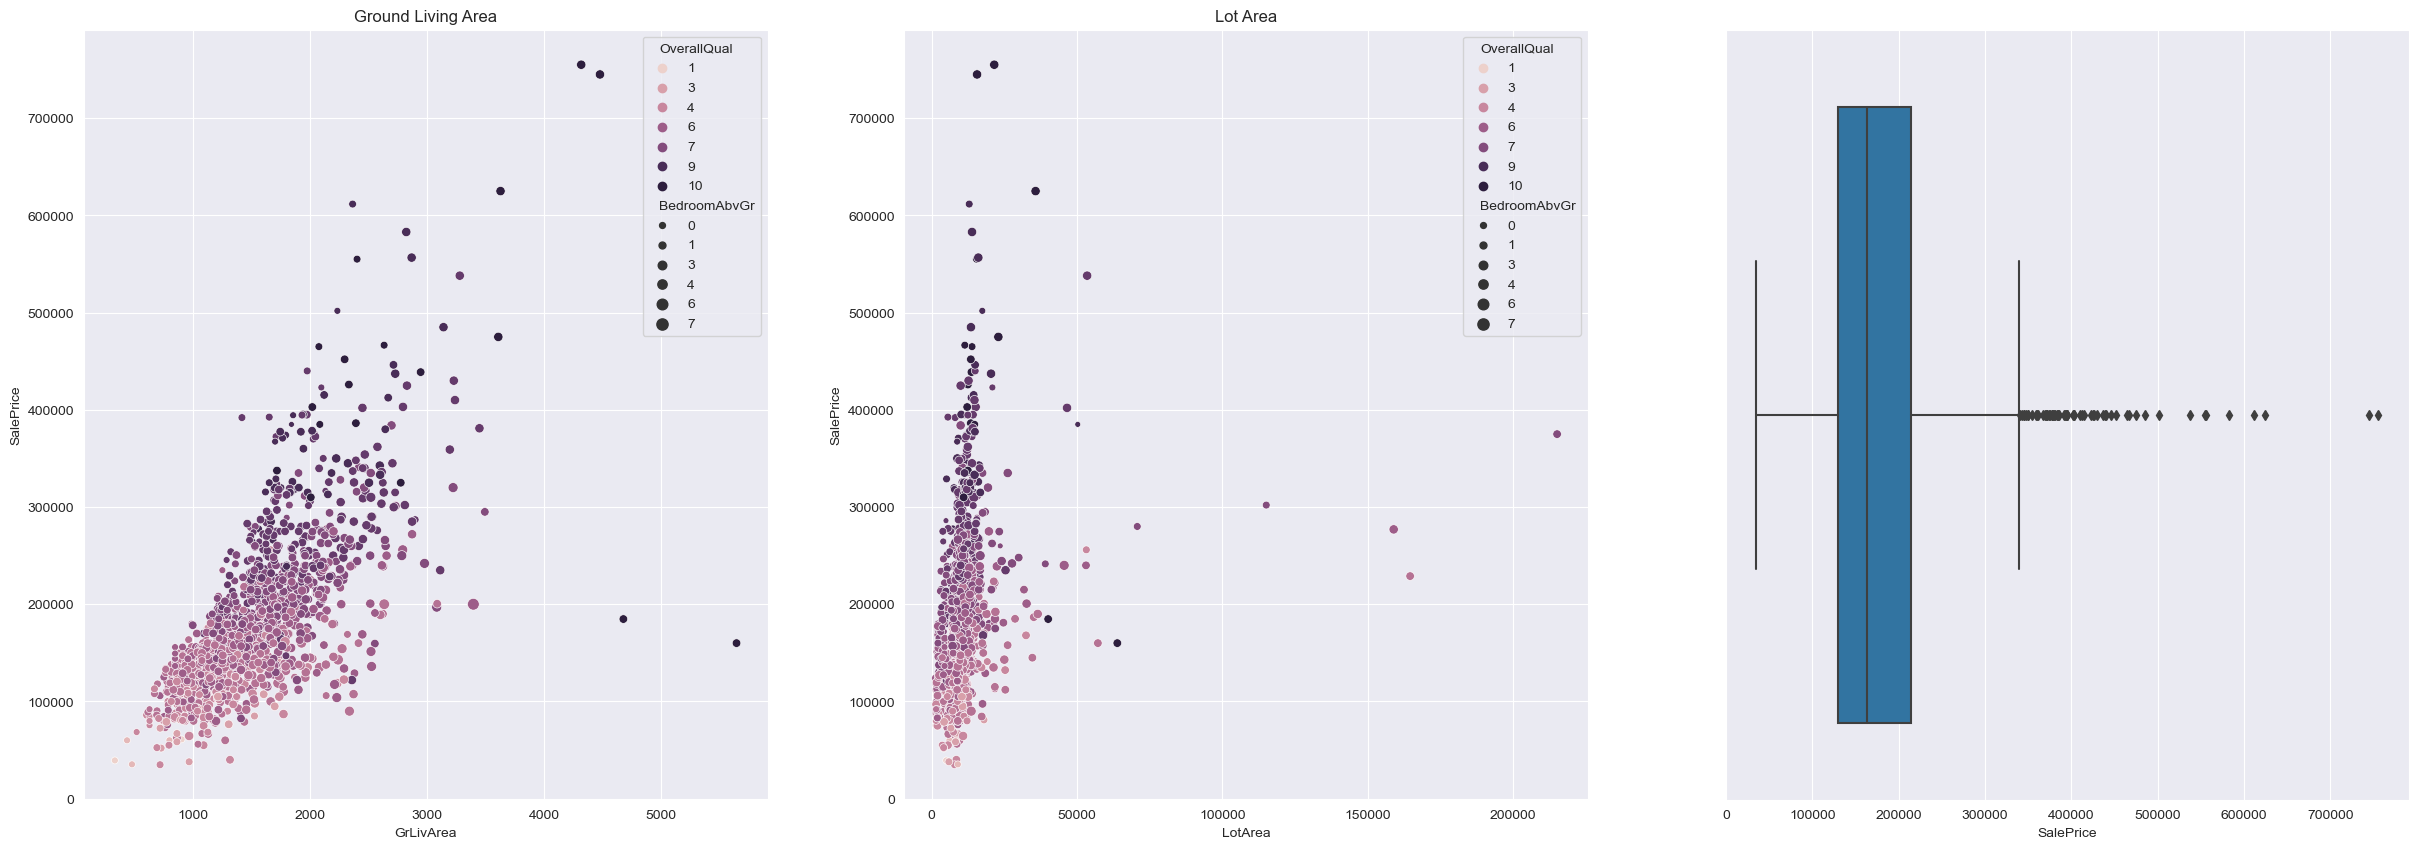

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
sns.scatterplot(x=df_train.GrLivArea, y=df_train.SalePrice, size=df_train.BedroomAbvGr, hue=df_train.OverallQual, ax=ax[0])
ax[0].set_title("Ground Living Area")

sns.scatterplot(x=df_train.LotArea,y=df_train.SalePrice,size=df_train.BedroomAbvGr,hue=df_train.OverallQual, ax=ax[1])
ax[1].set_title("Lot Area")

sns.boxplot(x=df_train.SalePrice)

Notes:

- Sale price of more then 500,000 would affect our model
- Houses with a lot area exceeding 75,000 are outliers
- Houses with ground living space of 4000 or more are outliers

I will drop these rows for a more accurate model

In [11]:
# Sale price exceeding 500,000
drop1 = df_train[df_train['SalePrice']>500000].index
df_train.drop(drop1, inplace=True)
df_train.shape

(1451, 81)

In [12]:
# Lot area drop
drop2 = df_train[df_train['LotArea']>75000].index
df_train.drop(drop2, inplace=True)
df_train.shape

(1447, 81)

In [13]:
# Ground Living Space Drop
drop3 = df_train[df_train['GrLivArea']>4000].index
df_train.drop(drop3, inplace=True)
df_train.shape

(1445, 81)

# Models

First I will prep the data for our models, then I will test each model and select the best performing

In [14]:
y = df_train['SalePrice'].to_numpy()
df_train.drop('SalePrice', axis=1, inplace=True)

X = df_train

In [15]:
(X_train, X_val, y_train, y_val) = train_test_split(X, y, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1083, 80)
(1083,)
(362, 80)
(362,)


In [16]:
# Find Categorical Columns
cat_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
# Find Numerical columns
num_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [17]:
# Preprocess numerical
num_transformer = SimpleImputer(strategy='constant')

# Preprocess Categorical
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols), ('cat', cat_transformer, cat_cols)])

### Gradient Boosting Regressor

In [18]:
model_GBR =  GradientBoostingRegressor(n_estimators=1100, loss='squared_error', subsample = 0.35, learning_rate = 0.05,random_state=1)
GBR_Pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model_GBR)])
GBR_Pipeline.fit(X_train, y_train)
preds_GBR = GBR_Pipeline.predict(X_val)
GBR_mse = MSE(y_val, preds_GBR, squared=False)

dict_mse['Gradient Boosting Regression'] = GBR_mse

print(GBR_mse)

19819.317733756998


### XGBoost

In [19]:
model_XGB = xg.XGBRegressor(n_estimators=1100, subsample=0.35, learning_rate=0.05, random_state=1)
XGB_Pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model_XGB)])
XGB_Pipeline.fit(X_train, y_train)
preds_XGB = XGB_Pipeline.predict(X_val)
XGB_mse = MSE(y_val, preds_XGB, squared=False)

dict_mse['XGBoosting Regression'] = XGB_mse

print(XGB_mse)

19146.963778581365


### Linear Regression

In [20]:
model_LR = LinearRegression()
LR_Pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model_LR)])
LR_Pipeline.fit(X_train, y_train)
preds_LR = LR_Pipeline.predict(X_val)
LR_mse = MSE(y_val, preds_LR, squared=False)

dict_mse['Linear Regression'] = LR_mse

print(LR_mse)

22052.32796204269


### Random Forest Regressor

In [21]:
model_RF = RandomForestRegressor(n_estimators=1100, min_samples_split=5, min_samples_leaf=5)
RF_Pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model_RF)])
RF_Pipeline.fit(X_train, y_train)
preds_RF = RF_Pipeline.predict(X_val)
RF_mse = MSE(y_val, preds_RF, squared=False)

dict_mse['Random Forest Regression'] = RF_mse

print(RF_mse)

22247.865320936875


# Plotting Results

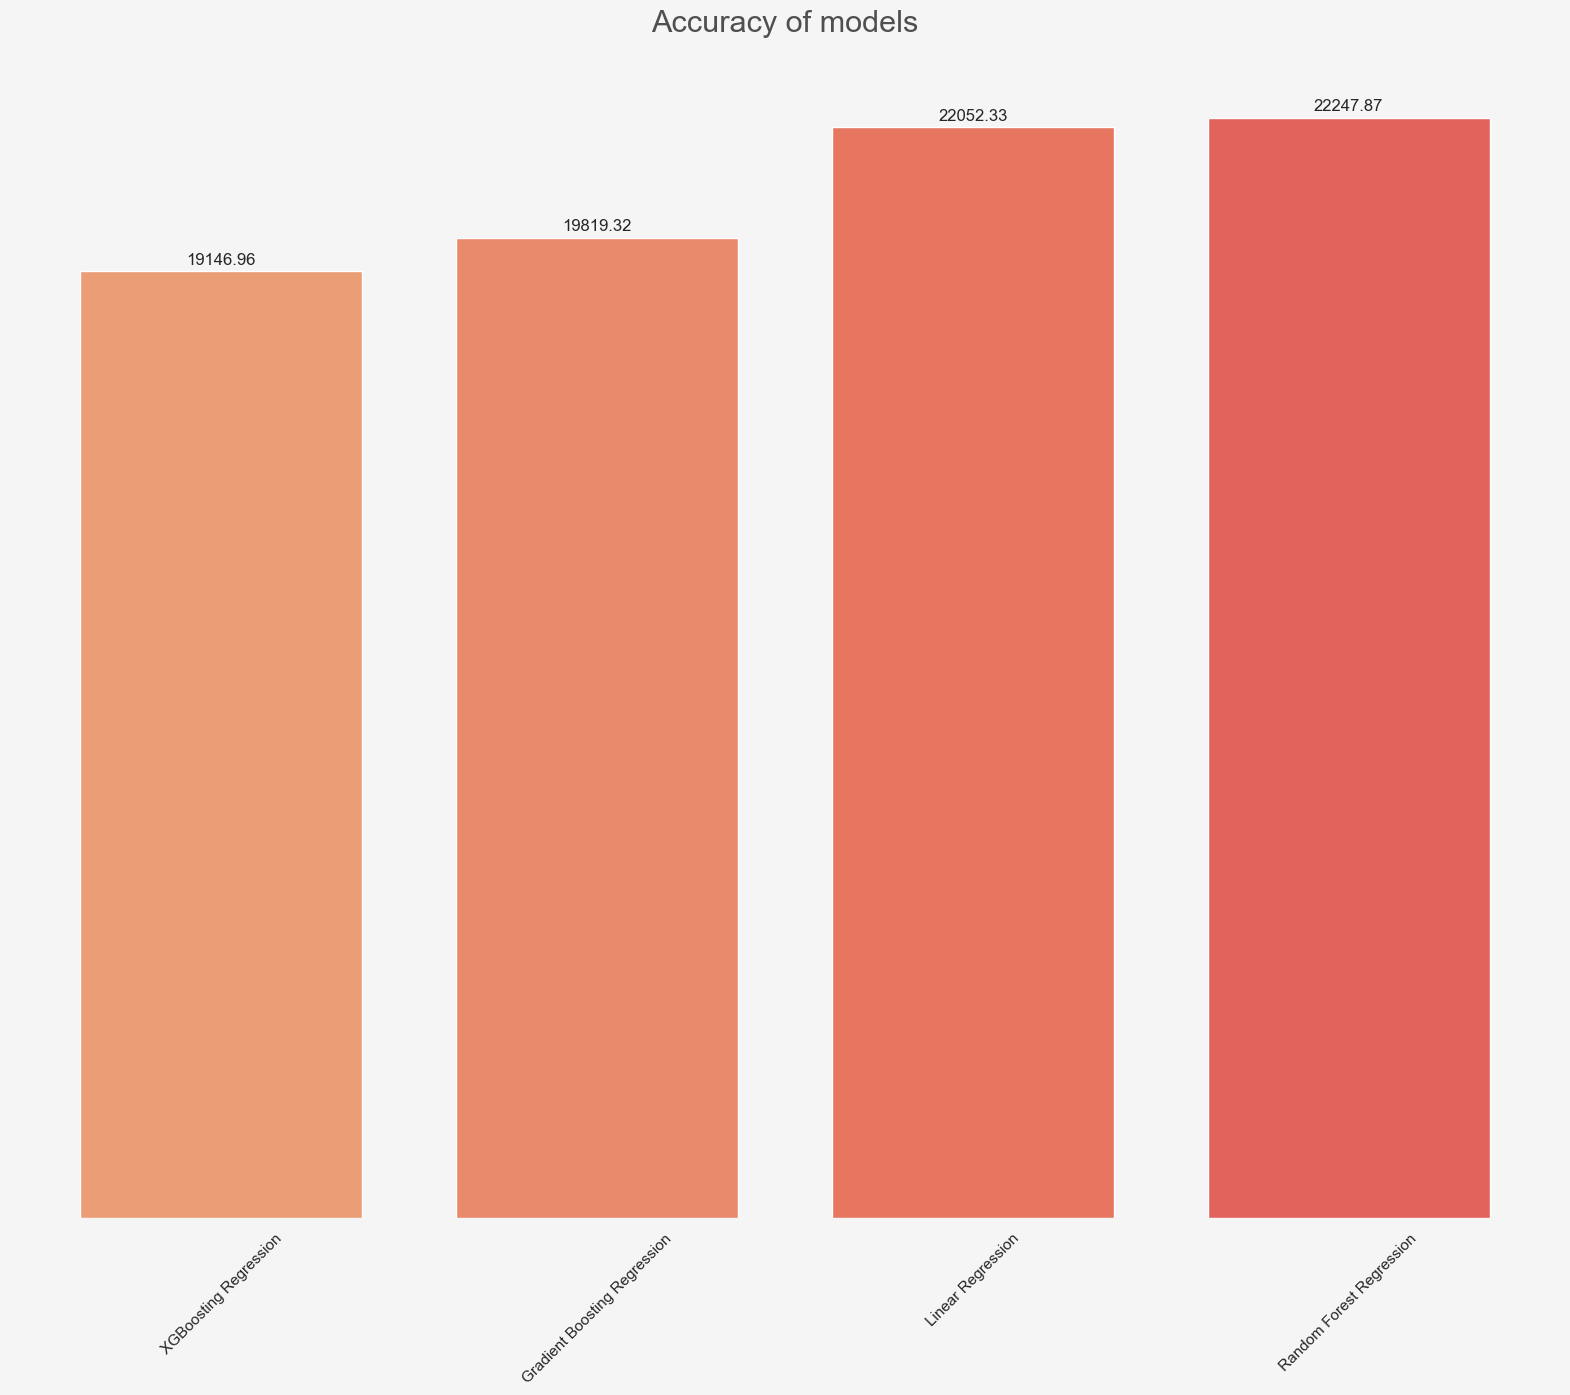

In [22]:
sns.set_theme()

# Dimensions and color
fig = plt.figure(figsize=(20,15))   
fig.patch.set_facecolor('whitesmoke')  

ax = plt.gca()
width = 0.3

# Sorts dict_acc into sorted list, then converts back to dictionary
sorted_dict_mse = sorted(dict_mse.items(), key=lambda x:x[1]) 
sorted_dict_mse = dict(sorted_dict_mse)

# Bar plot characteristics and color palette
ax.bar(
    range(len(sorted_dict_mse)),
    list(sorted_dict_mse.values()),
    color = sns.color_palette("flare", n_colors=12),
    width = 0.75,
)

# For loop adds percent labels to top of bars
for x1 in ax.patches:
    h1 = x1.get_height()
    
    percents = h1

    ax.annotate(
        '{:.2f}'.format(percents),
        xy=(x1.get_x() + x1.get_width() /2, h1),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',
        va= 'bottom'
    )

plt.grid(False) # Turns off gird
plt.box(False) # Turns off box
plt.xticks(range(len(sorted_dict_mse)), list(sorted_dict_mse.keys()), rotation =45) # Rotates x label
plt.yticks([]) # Removes y ticks as label are on top of bars

plt.title('Accuracy of models', size=22, alpha=0.8, y=1.02) # Title

plt.savefig("Accuracy of models.png", bbox_inches='tight', dpi=300) # Saves png file of bar plot

plt.show() # Displays bar plot

# displays sorted_dict_acc uncomment to use
#sorted_dict_mse

Bonus Kaggle Submission

In [23]:
# Data prep for model
# Sale price exceeding 500,000
drop1 = df_train_kaggle[df_train_kaggle['SalePrice']>500000].index
df_train_kaggle.drop(drop1, inplace=True)
# Lot area drop
drop2 = df_train_kaggle[df_train_kaggle['LotArea']>75000].index
df_train_kaggle.drop(drop2, inplace=True)
# Ground Living Space Drop
drop3 = df_train_kaggle[df_train_kaggle['GrLivArea']>4000].index
df_train_kaggle.drop(drop3, inplace=True)

X_train_kaggle = df_train_kaggle.drop(['SalePrice'],axis=1)
y_train_kaggle = df_train_kaggle.SalePrice
X_test = df_test

# Find Categorical Columns
cat_cols = [cname for cname in X_train.columns if X_train_kaggle[cname].dtype == "object"]
# Find Numerical columns
num_cols = [cname for cname in X_train.columns if X_train_kaggle[cname].dtype in ['int64', 'float64']]

# Preprocess numerical
num_transformer = SimpleImputer(strategy='constant')

# Preprocess Categorical
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols), ('cat', cat_transformer, cat_cols)])

# XGBoost model

model_XGB = xg.XGBRegressor(n_estimators=1100, subsample=0.35, learning_rate=0.05, random_state=1)
XGB_Pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model_XGB)])
XGB_Pipeline.fit(X_train_kaggle, y_train_kaggle)
preds_XGB = XGB_Pipeline.predict(X_test)

preds_XGB

array([129763.86, 157913.61, 182908.94, ..., 155881.11, 111566.78,
       234431.08], dtype=float32)

In [24]:
submission= pd.DataFrame({'Id': df_test.Id,'SalePrice': preds_XGB})

In [25]:
submission.head()

,Id,SalePrice
0,1461,129763.859375
1,1462,157913.609375
2,1463,182908.937500
3,1464,196415.656250
4,1465,186076.750000


In [26]:
submission.to_csv('submission.csv',index=False)